<a href="https://colab.research.google.com/github/EBaner/aws-healthscribe-demo/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [1]:
! git clone "https://github.com/DS3001/linearRegression"

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (22/22), done.


**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1) A model is linear if the relationship between its variables can be represented with a straight line.

2) The interceept for a dummy variable represents the difference in y for when the varaible is 1 or 0.

3)No linear regression cannot be used for classification effectively. This is because the outcomes of a classificaiton question cannot normally be represented by a straight line.

4) Some signs of overfitting are that the model performes well on training data but poorly on test data and having a much lower R^2 on test data versus the training data.

5) multi-colinearity is when two or more variables are highly correlated which can cause issues when doing regression. To solve this we can use a variable (x) related to one of the colinear variables (y) and predict the value of y through regression. We then use the predicted values of y instead of the actual values as they are less likely to be highly correlated with other variables

6)One way would be through polynomial terms and another would be through using interation terms by combining two predictors

7)The intercept is the expected value of y when all x's are 0. The slope coefficent is the difference in y for a increase in 1 for x. The dummy variable coefficent is the difference in y for when the dummy variable is 1 or 0.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

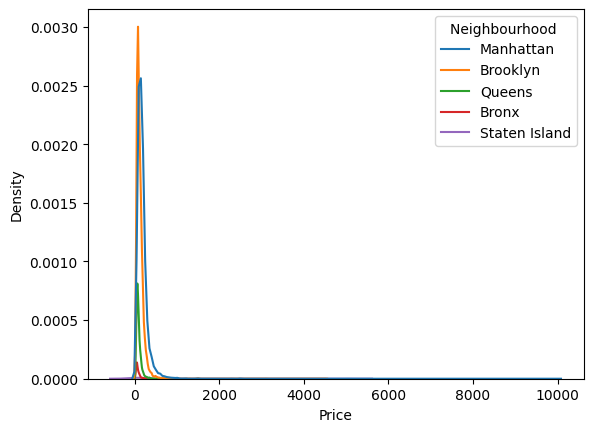

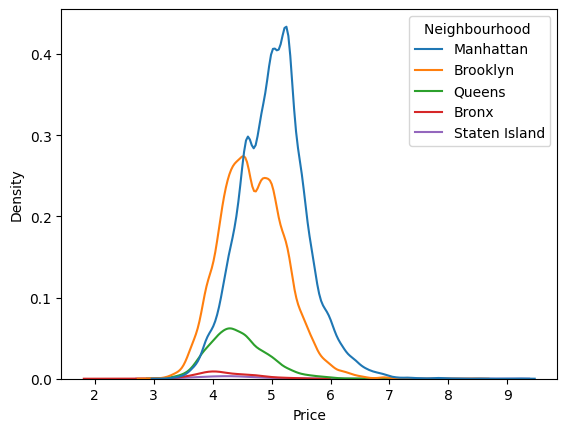

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')

df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()
df.head()


The most expensive bourough on average is Manhattan.

In [ ]:
#Q2
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


the coefficents are the same as the means from part 1.

In [ ]:
#Q3
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(reg.intercept_)
results


75.27649769585331


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


the first bourough, which is the Bronx is dropped as it is used as the reference. The intercept is about 75.3 and if we add the regression coefficent we will get the results from part 2.

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

most = 100*1.032257 + 89.4
print("most expensive property is ")
print(most)
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933
most expensive property is 
192.6257


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [ ]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(110.617+53.69+100*.0626)
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633
170.567


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


6) The main difference in part four and part five is the inclusion of the room type. This causes the other variables to have less of an effect on the model due to some of the information being explained by the room type.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


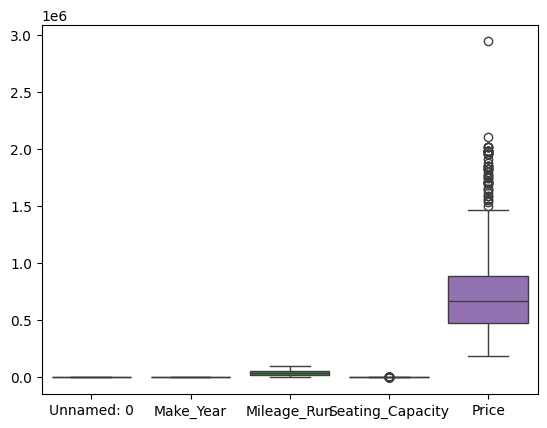

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/linearRegression/data/cars_hw.csv')
df0 = df # Save the original data for a few plots
sns.boxplot(data=df)
print(df.columns)

<Axes: >

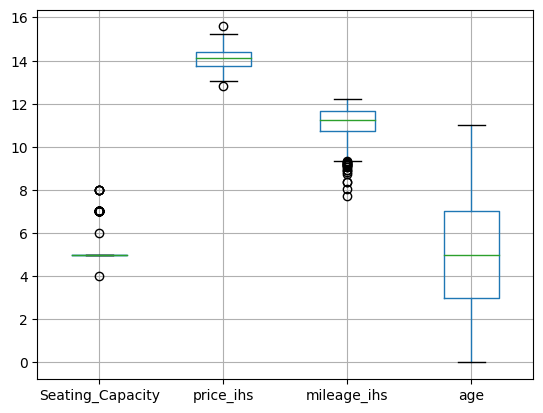

In [3]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df.boxplot()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


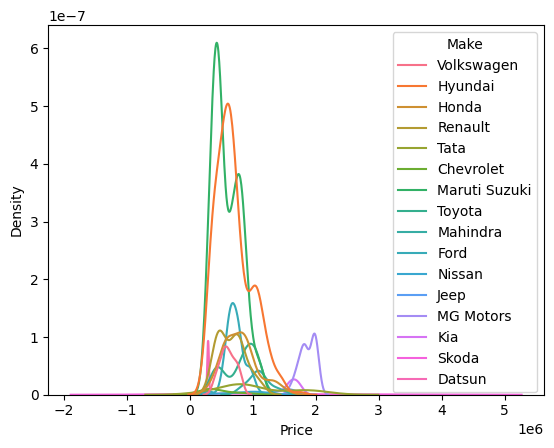

In [4]:
sns.kdeplot(data = df0, x='Price',hue='Make')
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


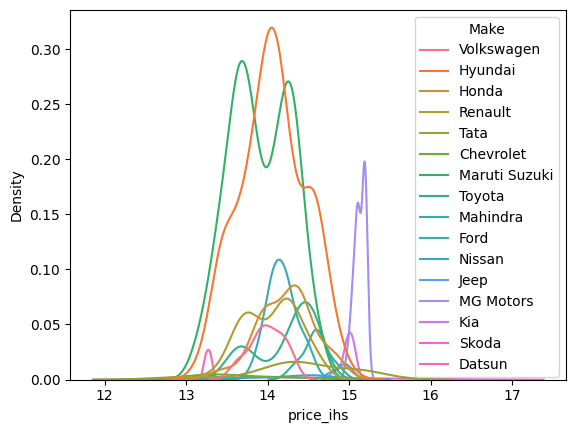

In [5]:
sns.kdeplot(data=df,x='price_ihs',hue='Make')
df['price_ihs'].groupby(df['Make']).describe()

<Axes: xlabel='price_ihs', ylabel='Density'>

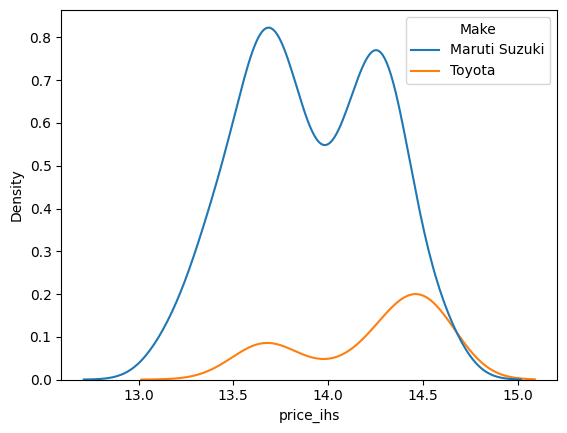

In [14]:
sns.kdeplot(data=df.loc[ df['Make'].isin(['Maruti Suzuki','Toyota'])  ,:],x='price_ihs',hue='Make')


most brands tend to price their cars in a somewhat narrow margin. The most expensive cars on average are the MG motors cars, while the cheapest are Suzuki and skoda.

In [22]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']


In [23]:
from sklearn import linear_model

# Numeric regression:
var_n = ['age','mileage_ihs','Seating_Capacity'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2


Numeric only Rsq:  0.3730936580698371
Numeric only RMSE:  0.38979664986687956


In [25]:
# Categorical regression:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
#
# Use a loop to make the dummy dataframe, but you could do it by hand in a bunch of lines:
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]
#
reg_c = linear_model.LinearRegression().fit(X_train_c,y_train) # Run regression
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test)) # R2
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c) # R2

Categorical only Rsq:  0.6912397287719194
Categorical only RMSE:  0.2735567764685881


In [26]:
# Combine numeric _n and categorical _c variables:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)
#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) # R2

All Rsq:  0.8184210353485427
All RMSE:  0.20978263605948888


The combined regression had the highest Rsq and the lowest RMSE making it perform the best. This means that including additional features helped the model.



In [27]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)
    #
    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # R2

1  Rsq:  0.8184210353485427
1 RMSE:  0.20978263605948888
2  Rsq:  0.8263437879376805
2 RMSE:  0.2051549179931692
3  Rsq:  0.682927199066673
3 RMSE:  0.27721470575927815
4  Rsq:  -1597228131217854.2
4 RMSE:  19675249.390109945


The best degree is 2.

<Axes: xlabel='price_ihs'>

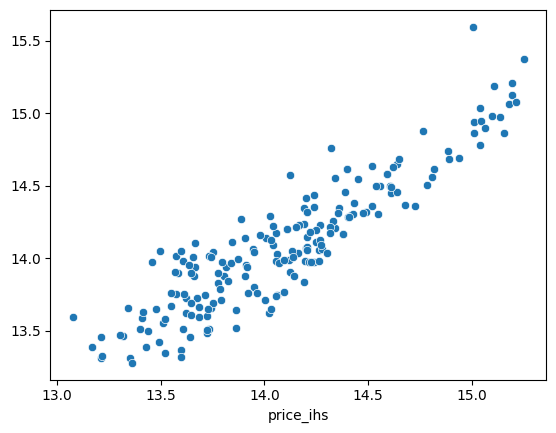

In [28]:
d = 2
#
expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
# Reset indices for concatenating:
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
# Run regression
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
# Predictions and residuals:
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

<Axes: xlabel='price_ihs', ylabel='Density'>

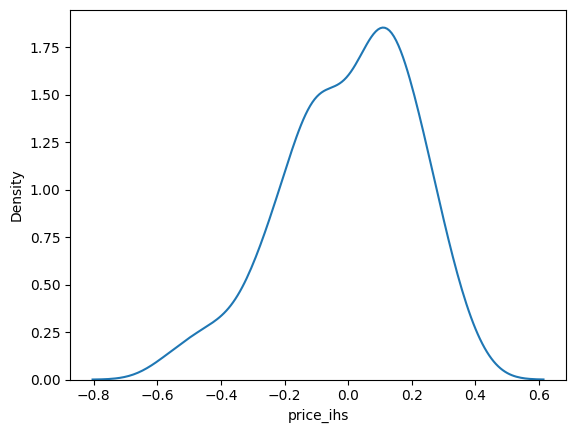

In [29]:
sns.kdeplot(residuals)

In [30]:
from sklearn import tree

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d) # Fit the classifier
    cart = model.fit(X_train_all, y_train) #
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test)) # R2

Depth:  2 , RMSE:  0.33017067249095333 , Rsq:  0.5502165747295897
Depth:  3 , RMSE:  0.30101437246229024 , Rsq:  0.626146954106309
Depth:  4 , RMSE:  0.279037450057972 , Rsq:  0.6787438518299886
Depth:  5 , RMSE:  0.26656199779396555 , Rsq:  0.706827704093242
Depth:  6 , RMSE:  0.24408202778187157 , Rsq:  0.7541908391567809
Depth:  7 , RMSE:  0.22923487763694547 , Rsq:  0.7831857365149237
Depth:  8 , RMSE:  0.2262174757301023 , Rsq:  0.788855991247723
Depth:  9 , RMSE:  0.24159923274232975 , Rsq:  0.7591661323057985
Depth:  10 , RMSE:  0.2415984411477959 , Rsq:  0.7591677104768776
Depth:  11 , RMSE:  0.2485351873245868 , Rsq:  0.7451396779843678
Depth:  12 , RMSE:  0.24353249006602767 , Rsq:  0.7552964456752692
Depth:  13 , RMSE:  0.25037697002945725 , Rsq:  0.7413483711293589
Depth:  14 , RMSE:  0.24050624610620353 , Rsq:  0.7613402516377761
Depth:  15 , RMSE:  0.24664314639102858 , Rsq:  0.7490052931895226
Depth:  16 , RMSE:  0.26319808602706857 , Rsq:  0.7141804623410439
Depth:  17 

The scatter plot looks rather linear and the residual plot is mostly around 0,

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

Rating        0
Size          0
Sector        0
avg_salary    0
job_state     0
Intercept     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


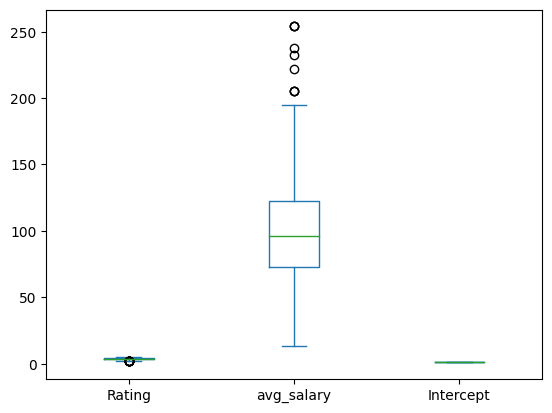

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/linearRegression/data/wages_hw.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df['Intercept'] = np.ones(df.shape[0])
print( np.sum(df.isnull()))

df['Sector'] = df['Sector'].str.replace('-1','Missing')
df.head()
df.describe()
df.plot.box()
tab = df['Sector'].value_counts()
np.random.seed(1000)

N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['avg_salary']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

In [37]:
from sklearn import linear_model

dummies = pd.get_dummies( df.loc[:,'Sector'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]
#
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Extract wage dummies
rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})

y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)
rdf.sort_values(by='slope',axis=0)

Rsq:  0.10786156021224103
RMSE:  31.81255349338017


,variable,slope
6,"Construction, Repair & Maintenance",26.500000
3,"Arts, Entertainment & Recreation",48.500000
11,Health Care,68.837500
24,Travel & Tourism,70.142857
19,"Oil, Gas, Energy & Utilities",78.181818
18,Non-Profit,79.700000
2,Agriculture & Forestry,80.500000
14,Manufacturing,80.537037
10,Government,86.055556
5,Business Services,96.239726


The Rsq is around 0.1 and the Media, Telecommmunications, and Accounting and Legal have the highest values.

<Axes: xlabel='Rating', ylabel='avg_salary'>

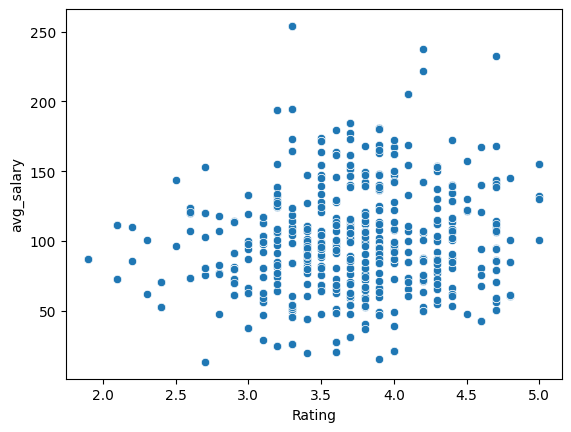

In [38]:
sns.scatterplot(data=df,x='Rating',y='avg_salary')

There is no obvious relationship.

In [39]:
from sklearn import linear_model

X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows, ['Intercept','Rating'] ]
print('Rsq: ', reg.score(X_test,y_test)) # R2
y_hat = reg.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

fx_num = reg.coef_[0] + reg.coef_[1]*np.arange(2,6,1)
gdf1 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':fx_num,'Version':'Numeric'})

rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)

Rsq:  0.0012158997447975217
RMSE:  33.660317944994524


,variable,slope
1,Rating,9.461627
0,Intercept,65.851291


If the rathing goes up by one the wages will go up by around 9.5k and the intercept is 65k meaning that is the base salary for zero star companies.

In [41]:
df['Rating_rnd'] = df['Rating'].round()

X_train = df.loc[train_rows,['Rating_rnd'] ]
dummies_train = pd.get_dummies(X_train['Rating_rnd'],dtype=int)

reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows,['Rating_rnd'] ]
dummies_test = pd.get_dummies(X_test['Rating_rnd'],dtype=int)
y_hat = reg.predict(dummies_test)

print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
rdf

Rsq:  -0.003408188834975734
RMSE:  33.73814685499916


,variable,slope
0,2.0,81.735294
1,3.0,95.054878
2,4.0,104.227528
3,5.0,102.457447


<Axes: xlabel='Rating', ylabel='Effect'>

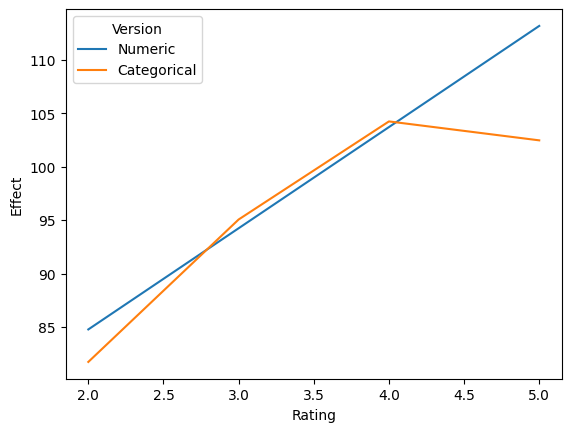

In [42]:
gdf2 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':reg.coef_,'Version':'Categorical'})
gdf =  pd.concat([gdf1,gdf2],axis=0)
sns.lineplot(data=gdf,x='Rating',y='Effect',hue='Version')

When looking at the graph you can see that the wages don't increase nearly as much between 4 and 5 stars. This could be becuase factors other than wages cause people to switch between jobs in that rating range.

In [44]:
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int )

# Fit linear model
dummies_train = dummies.iloc[train_rows,:]
reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression
rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
print(rdf.sort_values(by='slope',axis=0).to_string())

dummies_test = dummies.iloc[test_rows,:]
y_hat = reg.predict(dummies_test)
print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

                                  variable       slope
14  Construction, Repair & MaintenanceX3.0   26.500000
47                  TelecommunicationsX3.0   44.000000
39                          Non-ProfitX3.0   47.500000
5     Arts, Entertainment & RecreationX4.0   48.500000
31                       ManufacturingX2.0   52.500000
20                             FinanceX5.0   56.750000
24                         Health CareX4.0   58.413043
51                    Travel & TourismX4.0   70.142857
41        Oil, Gas, Energy & UtilitiesX4.0   78.181818
4               Agriculture & ForestryX5.0   80.500000
23                         Health CareX3.0   82.941176
21                          GovernmentX3.0   83.928571
3                  Aerospace & DefenseX5.0   84.357143
32                       ManufacturingX3.0   84.794118
18                             FinanceX3.0   86.625000
44                              RetailX2.0   86.833333
33                       ManufacturingX4.0   87.166667
7         

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

4) b* will be small if there is a small relationship between x and y. It is also affected by x if x has a large amount of random error or variability. The intercept a* is the average value of y when x = 0.
5) The b* coefficent would shrink, causing the predictive power of the model to decrease.

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

In [53]:
import pandas as pd


df = pd.read_csv("/content/linearRegression/data/Electric_Vehicle_Population_Data.csv")

df = df.dropna()
df = df[df['Electric Range'] > 0]
df['Model Year'] = df['Model Year'].astype(int)
df['Electric Range'] = df['Electric Range'].astype(float)

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


<Axes: xlabel='Model Year', ylabel='Electric Range'>

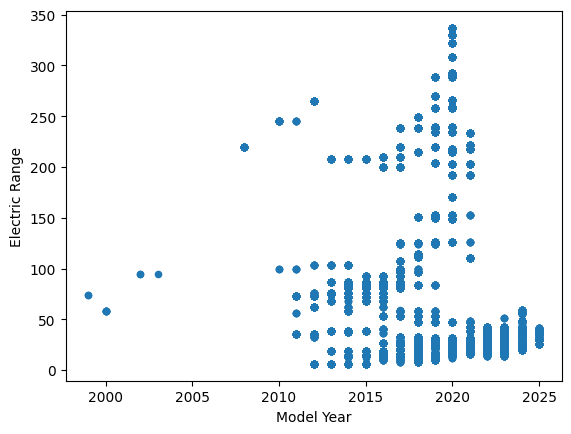

In [54]:
df.plot.scatter(x='Model Year',y='Electric Range')

In [55]:
current_year = 2024
df['Vehicle Age'] = current_year - df['Model Year']

X = df[['Vehicle Age', 'Make', 'Model']]
y = df['Electric Range']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, ['Make', 'Model'])])

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
model1.fit(X_train[:, :1], y_train)
y_test_pred1 = model1.predict(X_test[:, :1])
sse1 = mean_squared_error(y_test, y_test_pred1) * len(y_test)

model2 = LinearRegression()
model2.fit(X_train[:, :10], y_train)
y_test_pred2 = model2.predict(X_test[:, :10])
sse2 = mean_squared_error(y_test, y_test_pred2) * len(y_test)


model3 = LinearRegression()
model3.fit(X_train, y_train)
y_test_pred3 = model3.predict(X_test)
sse3 = mean_squared_error(y_test, y_test_pred3) * len(y_test)

print(f"Model 1 SSE: {sse1}")
print(f"Model 2 SSE: {sse2}")
print(f"Model 3 SSE: {sse3}")

Model 1 SSE: 176714618.7095663
Model 2 SSE: 162070351.30263138
Model 3 SSE: 14403850.429088058


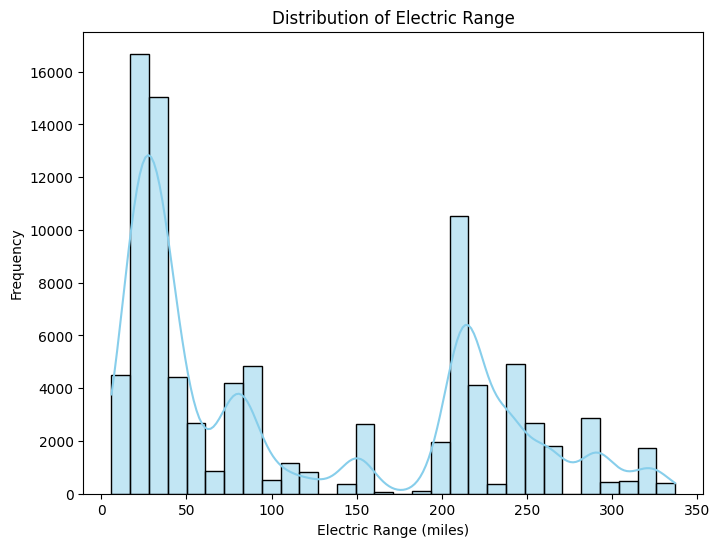

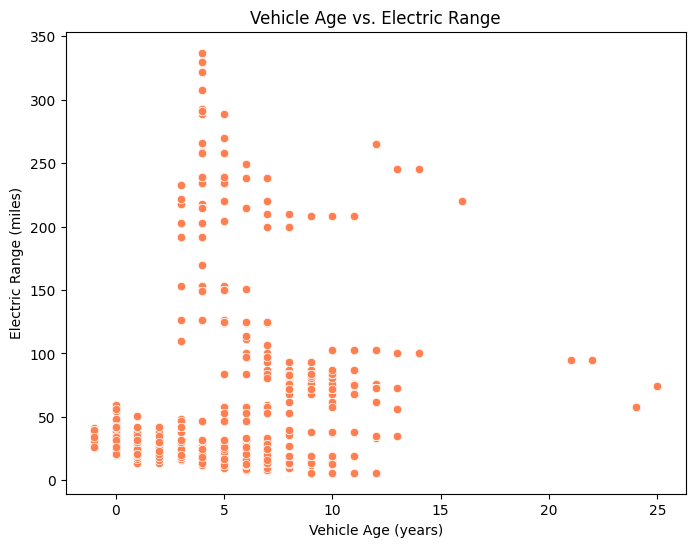

<ipython-input-58-2bb17cec50a6>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='grey')


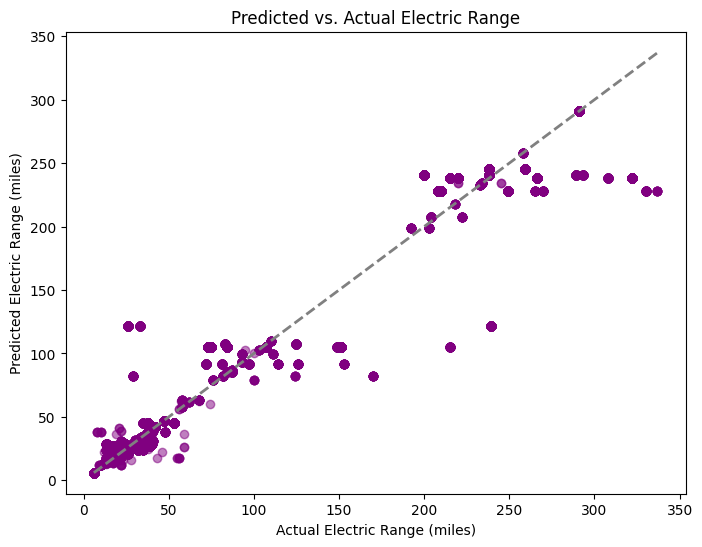

In [58]:
#Made with ChatGPT
# 1. Distribution of Electric Range
plt.figure(figsize=(8, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

# 2. Relationship between Vehicle Age and Electric Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Vehicle Age', y='Electric Range', data=df, color='coral')
plt.title('Vehicle Age vs. Electric Range')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Electric Range (miles)')
plt.show()

# 3. Predicted vs. Actual Electric Range (for Model 3 as example)
y_test_pred3 = model3.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred3, alpha=0.5, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='grey')
plt.title('Predicted vs. Actual Electric Range')
plt.xlabel('Actual Electric Range (miles)')
plt.ylabel('Predicted Electric Range (miles)')
plt.show()

The final model performed the best as it included all aspects of an electric car such as the age, model, and make. Compared to the other models the all inclusive one has a much lower SSE.